In [1]:
# Las librerías usadas para hacer el EDA será Pandas para la manipulación de los data sets, Pyplot para y Seaborn
# para tratar los gráficos
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_int_tfij = pd.read_excel('C:/Python/Data Science/Proyecto_2/Datasets/int_tfij.xlsx')
df_tmov_tfij = pd.read_excel('C:/Python/Data Science/Proyecto_2/Datasets/tmov_tfij.xlsx')
df_tv_penprov = pd.read_excel('C:/Python/Data Science/Proyecto_2/Datasets/Television.xlsx', sheet_name='Penetracion_prov_TV')
df_tv_acctot = pd.read_excel('C:/Python/Data Science/Proyecto_2/Datasets/Television.xlsx', sheet_name='Accesos_totales_TV')

In [3]:
df_int_tfij.head()

,Año,Trimestre,Provincia,Acceso por ADSL,Acceso por cablemodem,Acceso por fibra optica,Acceso por wireless,Acceso por otros,Total accesos por tecnologia,Mbps (Media de bajada),Accesos internet por cada 100 hab,Accesos internet por cada 100 hogares,Accesos telefonía fija por cada 100 hab,Accesos telefonía fija por cada 100 hogares
0,2024,2,Buenos Aires,214055,2722466,1849476,138638,64745,4989380,157.41,27.43,79.84,11.385010,36.436100
1,2024,2,Capital Federal,54102,1144781,230402,4493,29821,1463599,233.01,47.44,116.37,27.586382,66.464974
2,2024,2,Catamarca,4951,10303,58355,1384,81,75074,97.38,17.50,68.81,6.123383,25.090654
3,2024,2,Chaco,9448,57935,68944,8407,2358,147092,107.76,11.78,44.06,6.006026,23.554699
4,2024,2,Chubut,25955,80704,26516,31118,9930,174223,21.67,26.46,86.33,8.710244,30.779434


El EDA se hará enfocado en la tendencia y penetración de los servicios en la comunidad

El primer análisis será enfocado en la adopción de las diferentes tecnologías de accesos a internet por parte de la población con el fin de entender hacia donde se dirige la tendencia del rubro

In [4]:
#creamos el dataset que usaremos para mostrar la información. En este caso enfocado a los accesos de las diferentes tecnologías a lo largo de los años
df_accptech_grouped = df_int_tfij.groupby('Año')[['Acceso por ADSL', 'Acceso por cablemodem',
                                                'Acceso por fibra optica', 'Acceso por wireless', 'Acceso por otros']].sum()

Actualmente, y según los últimos registros, la conectividad a internet se distribuye de la siguiente manera según sus accesos

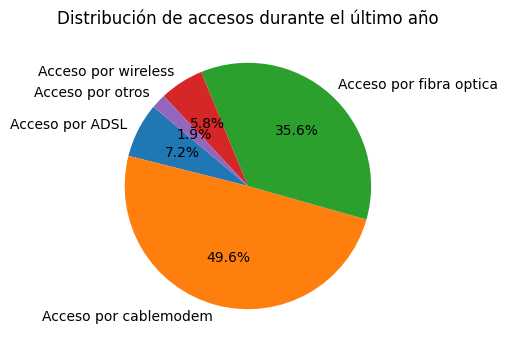

In [5]:
ufila = df_accptech_grouped.iloc[-1] # Selecciona el último año (o cualquier fila específica)

#Determino las columnas a graficar
columnas = ['Acceso por ADSL', 'Acceso por cablemodem', 'Acceso por fibra optica', 'Acceso por wireless', 'Acceso por otros']
seleccion = ufila[columnas]
# Utilizamos el gráfico tipo torta
plt.figure(figsize=(4, 4))
plt.pie(seleccion, labels=seleccion.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de accesos durante el último año')
plt.show()

Nos damos cuenta de que la conectividad se basa fundamentalmente en el acceso por cablemodem y por fibra óptica

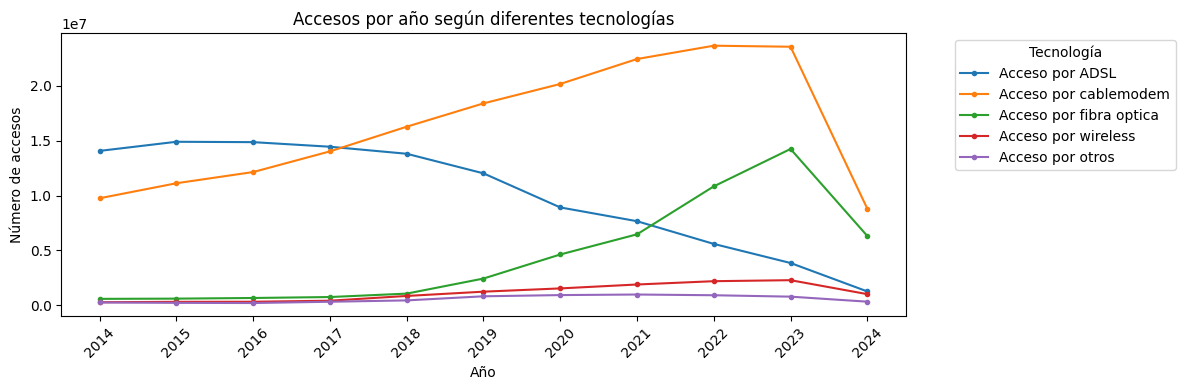

In [6]:
# Creamos otro gráfico con el fin de ver la evolución de las tecnologías en el tiempo

plt.figure(figsize=(12, 4))
for tecnologia in df_accptech_grouped.columns:
    plt.plot(df_accptech_grouped.index, df_accptech_grouped[tecnologia], marker='.', label=tecnologia)
plt.title('Accesos por año según diferentes tecnologías')
plt.xlabel('Año')
plt.ylabel('Número de accesos')
plt.legend(title='Tecnología', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(df_accptech_grouped.index, rotation=45)  # Rota las etiquetas del eje x si es necesario
plt.tight_layout()
plt.show()

Del gráfico podemos ver que las tecnologías en aumento son fibra óptica y cablemodem, aunque esta última se aprecia que su crecimiento se está aplanando. Por el otro lado, también vemos que el ADSL es la tecnología que va en descenso

In [7]:
df_int_penpob_grouped = df_int_tfij.groupby(['Año', 'Provincia'])['Accesos internet por cada 100 hab'].mean().reset_index()

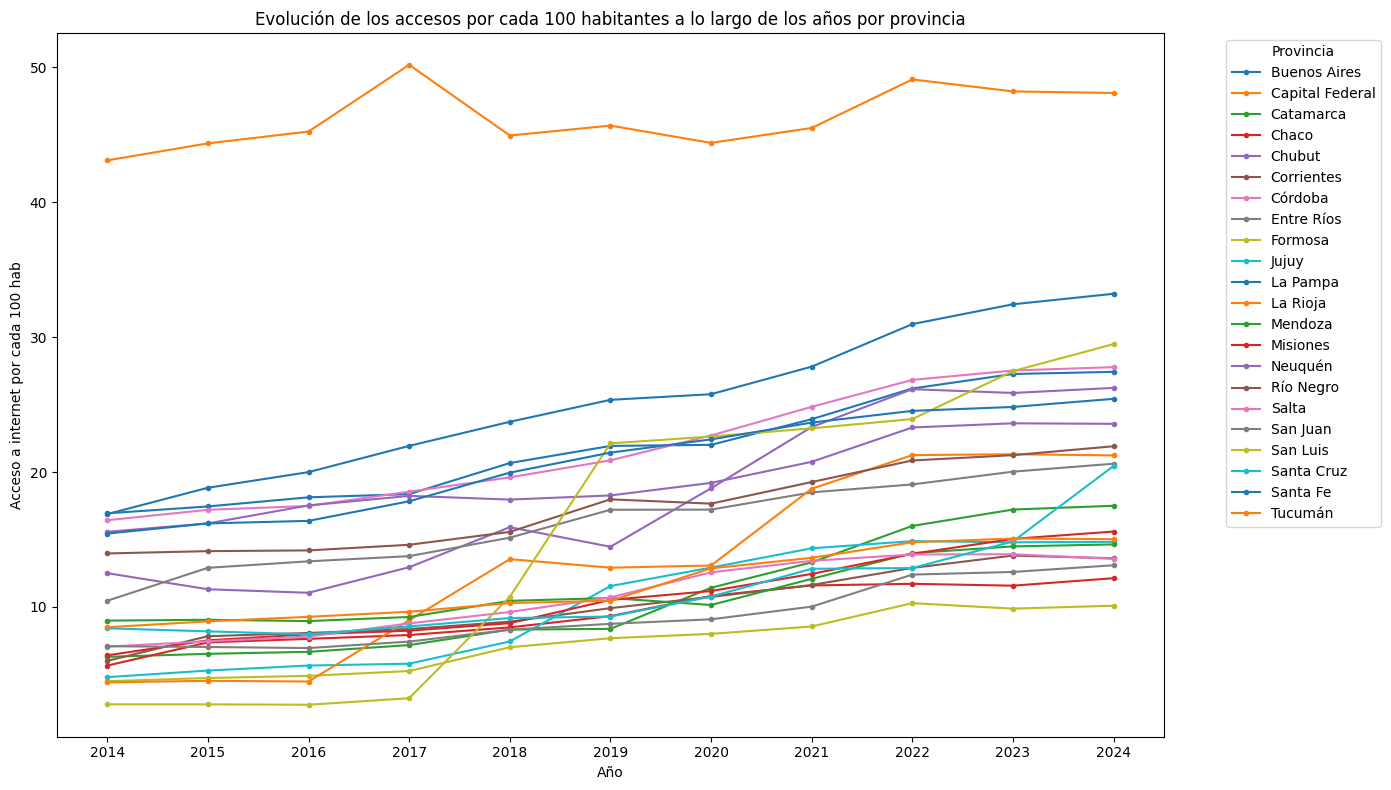

In [8]:
plt.figure(figsize=(14, 8))
for provincia in df_int_penpob_grouped['Provincia'].unique():
    datos_provincia = df_int_penpob_grouped[df_int_penpob_grouped['Provincia'] == provincia]
    plt.plot(datos_provincia['Año'], datos_provincia['Accesos internet por cada 100 hab'], marker='.', label=provincia)
plt.title('Evolución de los accesos por cada 100 habitantes a lo largo de los años por provincia')
plt.xlabel('Año')
plt.ylabel('Acceso a internet por cada 100 hab')
plt.legend(title='Provincia', bbox_to_anchor=(1.05, 1), loc='upper left')  # Ubicación de la leyenda fuera del gráfico
plt.xticks(sorted(df_int_penpob_grouped['Año'].unique()))  # Asegura que los años en el eje X estén en orden y sin duplicados
plt.tight_layout()  # Ajusta el gráfico para evitar solapamiento

En general se observa una tendencia al crecimiento de los accesos en todas las ciudad, aunque algunas provincias como Capital Federal se evidencia más un estancamiento

In [9]:
#MODIFICAR CONSULTA PARA TOMAR EL ÚLTIMO AÑO Y RESTARLO CON EL PRIMERO PARA DETERMINAR EL CRECIMIENTO. HACER ESTO PARA TODOS LOS GRÁFICOS DE CRECIMIENTO

In [10]:
#Para evaluar mejor el crecimiento que han tenido las provincias a lo largo del tiempo se graficará una columna 
# calculada entre la diferencia del registro más antiguo y el más moderno
crecimiento_acc = df_int_tfij.groupby('Provincia')['Accesos internet por cada 100 hab'].agg(lambda x: x.max() - x.min()).reset_index() 
crecimiento_acc.columns = ['Provincia', 'Crecimiento']
crecimiento_acc.sort_values('Crecimiento', ascending=True, inplace=True) #Ordenamos los valores para poder visualizar de mejor manera los datos

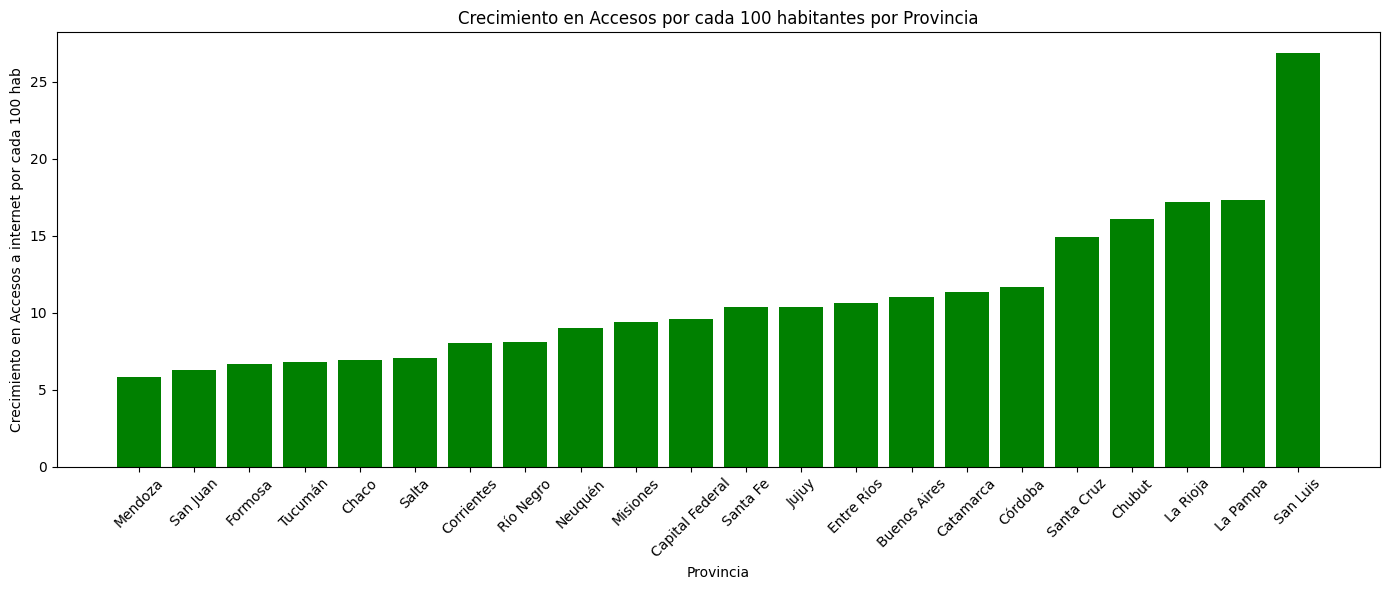

In [11]:

plt.figure(figsize=(14, 6)) 
plt.bar(crecimiento_acc['Provincia'], crecimiento_acc['Crecimiento'], color='green') 
plt.xlabel('Provincia') 
plt.ylabel('Crecimiento en Accesos a internet por cada 100 hab') 
plt.title('Crecimiento en Accesos por cada 100 habitantes por Provincia') 
plt.xticks(rotation=45) 
plt.tight_layout() 
plt.show()

Se puede ver que las 3 provincias con menos crecimiento son Mendoza, San Juan y Fomosa y las 3 con mayor crecimiento La Rioja, La Pampa y San Luis

In [12]:
#Otro parámetro que podemos evaluar es la evolución de la velocidad de internet a través del tiempo
df_int_mbps_grouped = df_int_tfij.groupby('Año')['Mbps (Media de bajada)'].mean().reset_index()

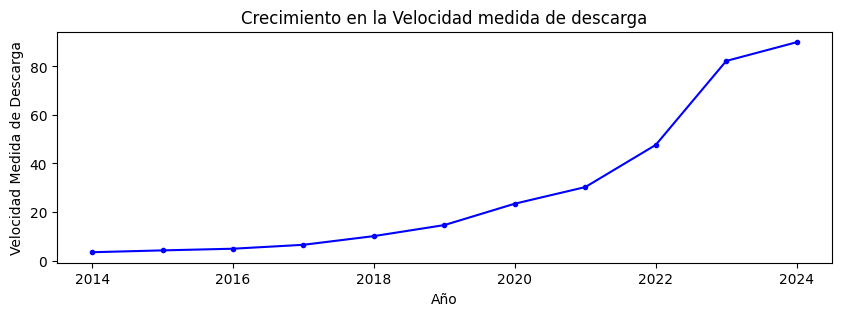

In [13]:
plt.figure(figsize=(10, 3)) 
plt.plot(df_int_mbps_grouped['Año'], df_int_mbps_grouped['Mbps (Media de bajada)'], color='blue', marker='.')
plt.xlabel('Año') 
plt.ylabel('Velocidad Medida de Descarga') 
plt.title('Crecimiento en la Velocidad medida de descarga')
plt.xticks(rotation=0)
plt.show()

Podemos ver como a través de los años la velocidad promedio de internet a ido aumentando de manera exponencial en el país

In [14]:
# También podemos verlo por provincia
df_int_mbpsprov_grouped = df_int_tfij.groupby(['Año', 'Provincia'])['Mbps (Media de bajada)'].mean().reset_index()

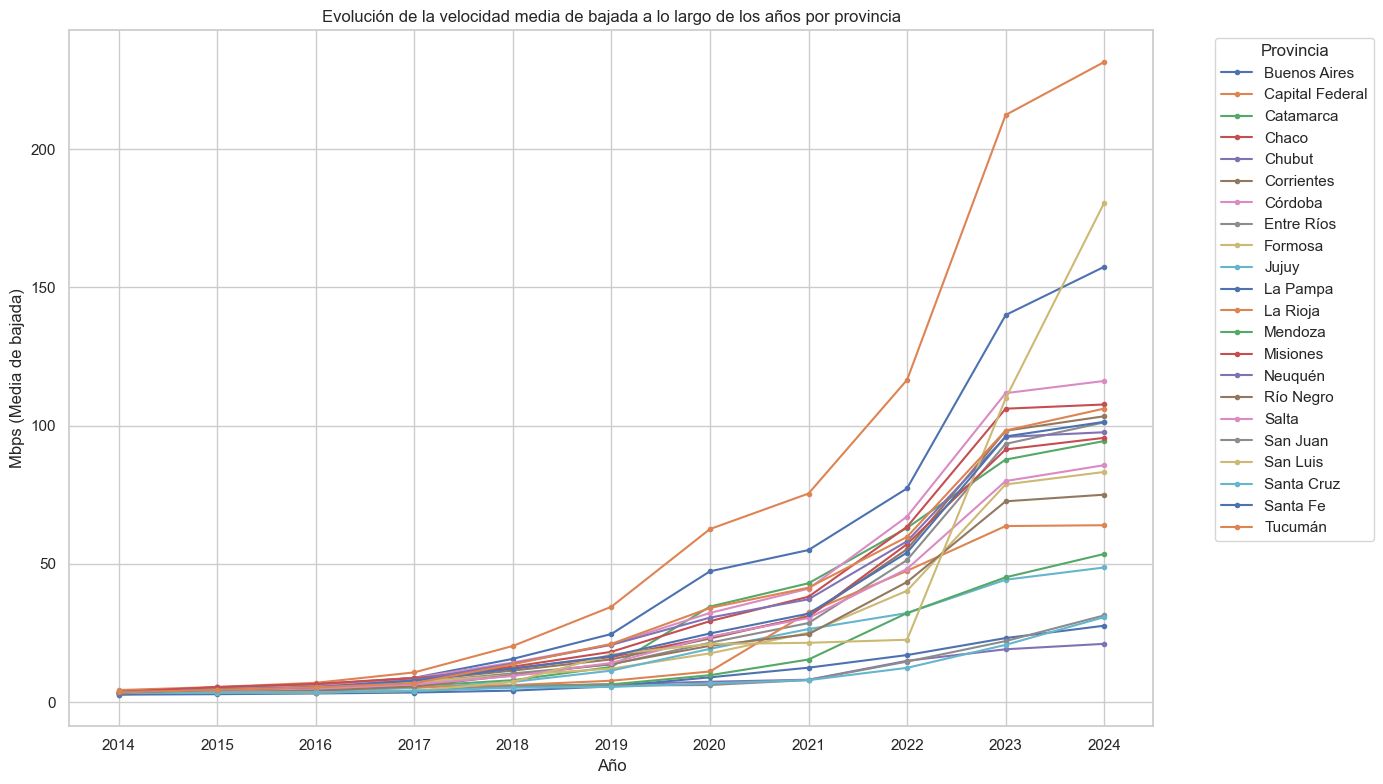

In [15]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(14, 8))
for provincia in df_int_mbpsprov_grouped['Provincia'].unique():
    datos_provincia = df_int_mbpsprov_grouped[df_int_mbpsprov_grouped['Provincia'] == provincia]
    plt.plot(datos_provincia['Año'], datos_provincia['Mbps (Media de bajada)'], marker='.', label=provincia)
plt.title('Evolución de la velocidad media de bajada a lo largo de los años por provincia')
plt.xlabel('Año')
plt.ylabel('Mbps (Media de bajada)')
plt.legend(title='Provincia', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(sorted(df_int_mbpsprov_grouped['Año'].unique()))
plt.tight_layout()

También observamos que el crecimiento de las velocidades ha sido de manera exponencial durante los año, claro que en la mayoría de los casos durante el último año hubo un estancamiento

In [16]:
#Podemos analizar cuánto a crecido la velocidad en las diferentes provincias y en qué provincias ha tenido un mayor salto
crecimiento_vel = df_int_mbpsprov_grouped.groupby('Provincia')['Mbps (Media de bajada)'].agg(lambda x: x.max() - x.min()).reset_index() 
crecimiento_vel.columns = ['Provincia', 'Crecimiento']
crecimiento_vel.sort_values('Crecimiento', ascending=True, inplace=True)

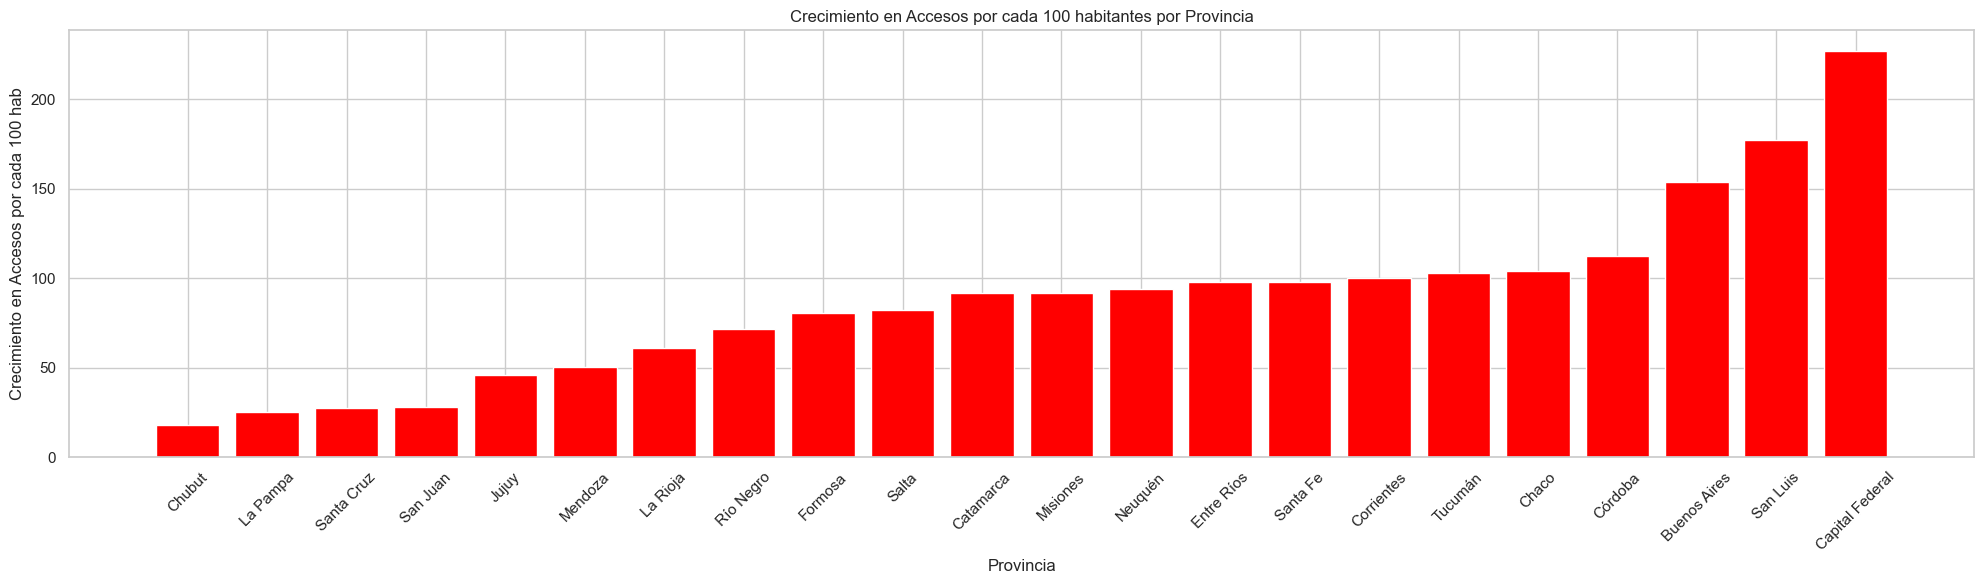

In [17]:
plt.figure(figsize=(20, 6)) 
plt.bar(crecimiento_vel['Provincia'], crecimiento_vel['Crecimiento'], color='red') 
plt.xlabel('Provincia') 
plt.ylabel('Crecimiento en Accesos por cada 100 hab') 
plt.title('Crecimiento en Accesos por cada 100 habitantes por Provincia') 
plt.xticks(rotation=45) 
plt.tight_layout() 
plt.show()

Las provincias de Chubut, La Pampa, Santa Cruz y San Juan son las más retrasadas respecto al servicio de internet y por otro lado Buenos Aires, San Luis y Capital Federal destacan por su excelente crecimiento

In [18]:
#Para seguir con nuestro análisis del internet podemos ver la penetración del servicio por cada 100 habitantes
df_int_pentot_grouped = df_int_tfij.groupby('Año')['Accesos internet por cada 100 hab'].mean().reset_index()

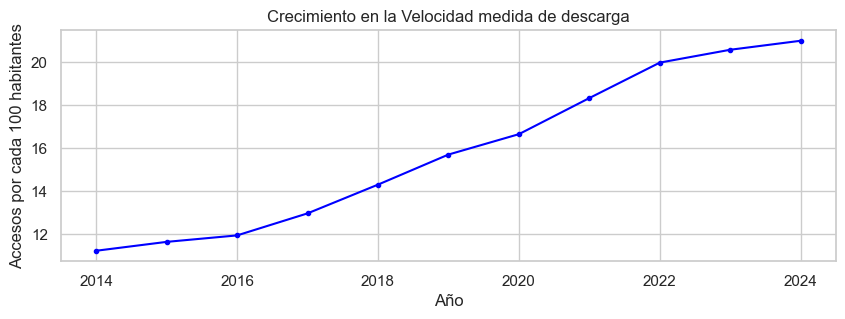

In [19]:
plt.figure(figsize=(10, 3)) 
plt.plot(df_int_pentot_grouped['Año'], df_int_pentot_grouped['Accesos internet por cada 100 hab'], color='blue', marker='.')
plt.xlabel('Año') 
plt.ylabel('Accesos por cada 100 habitantes') 
plt.title('Crecimiento en la Velocidad medida de descarga')
plt.xticks(rotation=0)
plt.show()

Todo el crecimiento en tecnología va de la mano con el consumo del internet. Podemos ver una clara tendencia al alza del consumo del servicio en los habitantes a lo largo del tiempo. en 10 años casi se ha duplicado el acceso

Para complementar el análisis de las estadísticas de internet postularemos que de la mano de este crecimiento, las tecnologías como la telefonía fija debiesen verse disminuidas. En contraste, la penetración de la telefonía móvil, que tiene la posibilidad de acceder a internet con los smartphones debiese verse incrementada

In [20]:
#creamos dataframe para incorporar el internet al análisis y poder contrastar la evolución a través de los años de los servicios
df_tfvstm_grouped = df_tmov_tfij.groupby('Año')[['Accesos telefonía movil por cada 100 hab', 'Accesos telefonía fija por cada 100 hab']].mean()

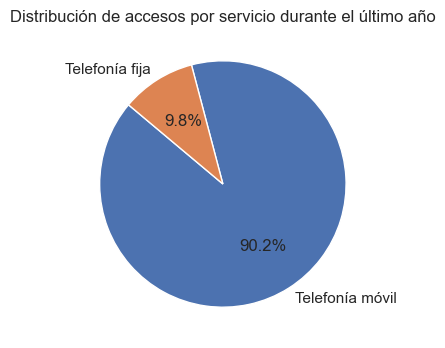

In [21]:
ufilaa = df_tfvstm_grouped.iloc[-1] # Selecciona el último año (o cualquier fila específica)
#Determino las columnas a graficar
columnas = ['Accesos telefonía movil por cada 100 hab', 'Accesos telefonía fija por cada 100 hab']
seleccion = ufilaa[columnas]
etiquetas = ['Telefonía móvil', 'Telefonía fija']
# Utilizamos el gráfico tipo torta
plt.figure(figsize=(4, 4))
plt.pie(seleccion, labels=etiquetas, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de accesos por servicio durante el último año')
plt.show()

Podemos ver claramente que la penetración de la telefonía móvil por cada 100 habitantes es por lejos el servicio más usado teniendo directamente que ver con la posibilidad que brinda el teléfono móvil para acceder a internet

Ahora contrastaremos como ha sido la evolución de la telefonía móvil vs la telefonía fija a lo largo de los años

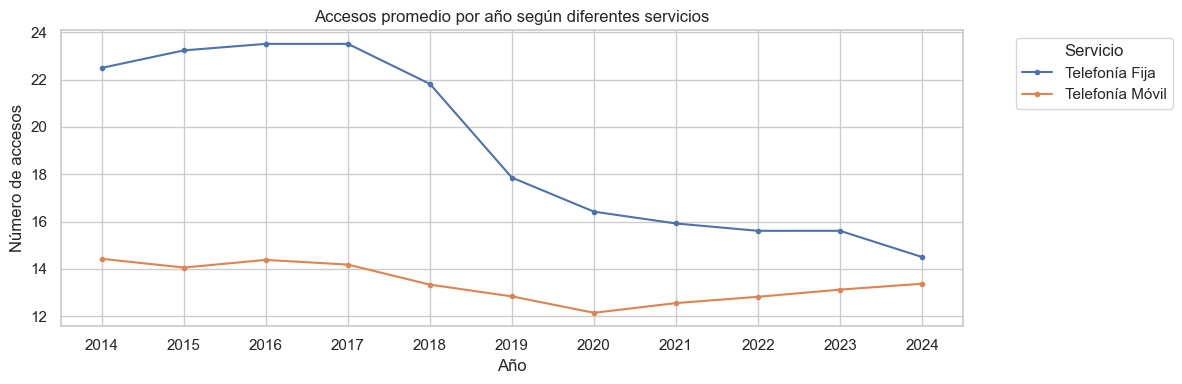

In [22]:
#Creamos otro gráfico con el fin de ver la evolución de la tendencia de los servicios telefónicos a través de los años

plt.figure(figsize=(12, 4))
#Definimos las líneas que plotearemos en el gráfico
plt.plot(df_tfvstm_grouped.index, df_tfvstm_grouped['Accesos telefonía fija por cada 100 hab'], marker='.', label='Telefonía Fija')

    #Dividiremos por 10 los accesos de telefonía móvil para acercar las líneas y visualizar de mejor manera la tendencia
plt.plot(df_tfvstm_grouped.index, df_tfvstm_grouped['Accesos telefonía movil por cada 100 hab']/10, marker='.', label='Telefonía Móvil')

plt.title('Accesos promedio por año según diferentes servicios')
plt.xlabel('Año')
plt.ylabel('Número de accesos')
plt.legend(title='Servicio', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(df_tfvstm_grouped.index, rotation=0)  # Rota las etiquetas del eje x si es necesario
plt.tight_layout()
plt.show()

La telefonía fija se ha visto fuertemente disminuida con el pasar de los años, no así la telefonía móvil que práctivamente se ha mantenido constante con los años

Podemos ver también es el consumo referente al servicio de televsión

In [23]:
df_tv_acctot_grouped = df_tv_acctot.groupby('Año')[['Accesos TV por suscripción', 'Accesos TV satelital']].mean()

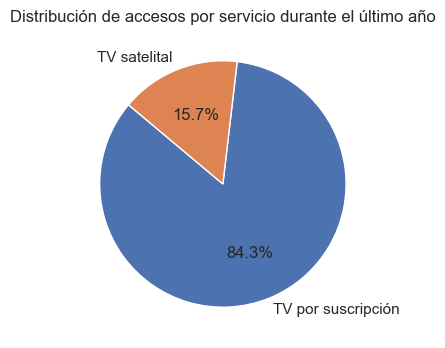

In [24]:
ufilaaa = df_tv_acctot_grouped.iloc[-1] # Selecciona el último año (o cualquier fila específica)
#Determino las columnas a graficar
columnas = ['Accesos TV por suscripción', 'Accesos TV satelital']
seleccion = ufilaaa[columnas]
etiquetas = ['TV por suscripción', 'TV satelital']
# Utilizamos el gráfico tipo torta
plt.figure(figsize=(4, 4))
plt.pie(seleccion, labels=etiquetas, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de accesos por servicio durante el último año')
plt.show()

In [25]:
#Para el siguiente gráfico creamos el dataframe que nos permitirá ver la tendencia de las suscripciones por cada 100 hogares según la provincia
df_tv_penprov_grouped = df_tv_penprov.groupby(['Año', 'Provincia'])['Accesos TV por suscripción por cada 100 hogares'].mean().reset_index()

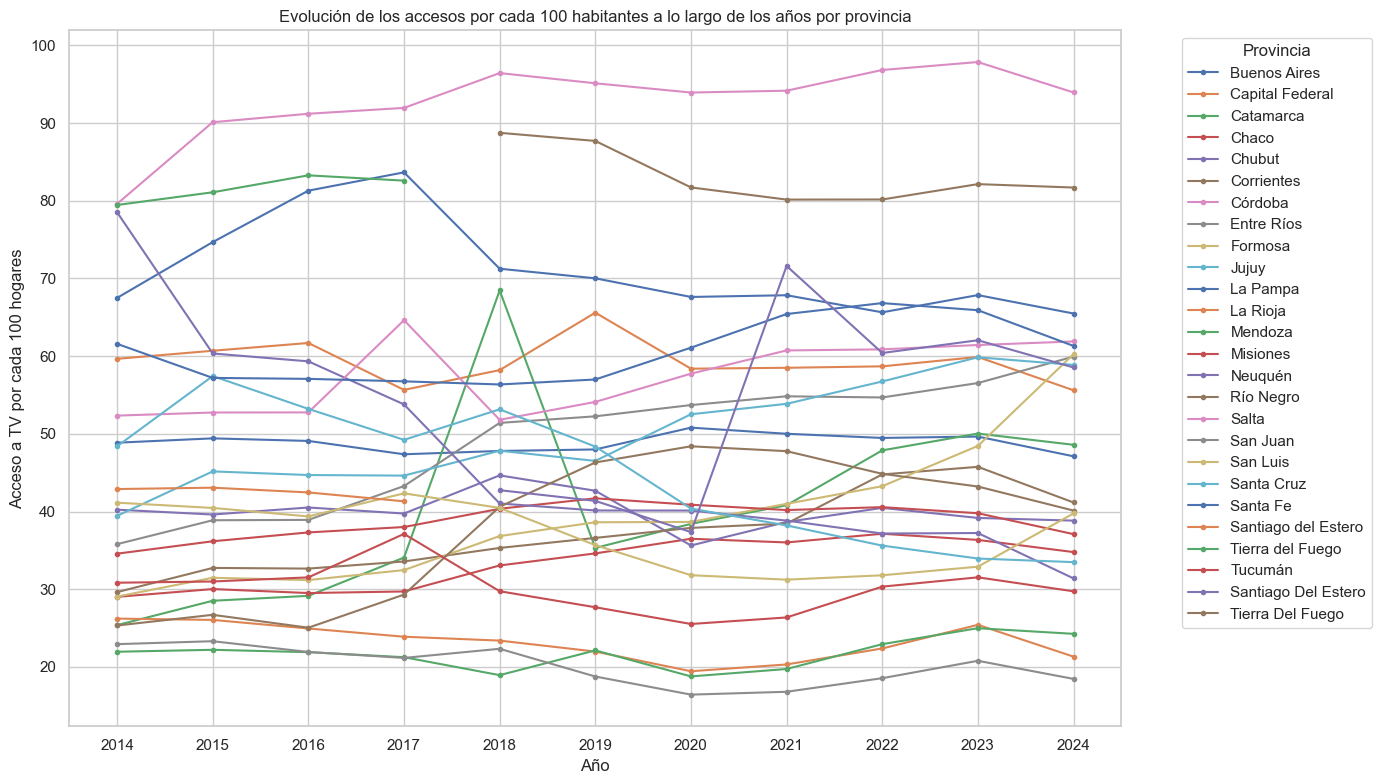

In [26]:
plt.figure(figsize=(14, 8))
for provincia in df_tv_penprov_grouped['Provincia'].unique():
    datos_provincia = df_tv_penprov_grouped[df_tv_penprov_grouped['Provincia'] == provincia]
    plt.plot(datos_provincia['Año'], datos_provincia['Accesos TV por suscripción por cada 100 hogares'], marker='.', label=provincia)
plt.title('Evolución de los accesos por cada 100 habitantes a lo largo de los años por provincia')
plt.xlabel('Año')
plt.ylabel('Acceso a TV por cada 100 hogares')
plt.legend(title='Provincia', bbox_to_anchor=(1.05, 1), loc='upper left')  # Ubicación de la leyenda fuera del gráfico
plt.xticks(sorted(df_tv_penprov_grouped['Año'].unique()))  # Asegura que los años en el eje X estén en orden y sin duplicados
plt.tight_layout()  # Ajusta el gráfico para evitar solapamiento

No se detectan tendencias de crecimiento, más bien el gráfico muestra que en general ha habido un estancamiento durante los últimos 10 años, Es decir, que el mercado ya está saturado o hay muy poco espacio para crecimiento.

## CALCULOS DE KPIs

In [69]:
df_int_penhog = pd.read_excel('C:/Python/Data Science/Proyecto_2/Datasets/Internet.xlsx', sheet_name='Penetracion-hogares')

KPI incremento de internet en los hogares

In [81]:
# Crear un nuevo DataFrame para los cálculos, asegurando que es una copia
df_KPIs = df_int_penhog[['Año', 'Trimestre', 'Provincia', 'Accesos por cada 100 hogares']]
df_KPIs.rename(columns={'Accesos por cada 100 hogares': 'Accesos internet por cada 100 hogares'}, inplace=True)

# Ordenar por las columnas clave (si no están ya ordenadas)
df_KPIs.sort_values(by=['Provincia', 'Año', 'Trimestre'], ascending=[True, False, False], inplace=True)

# Calcular la variación por cada provincia
df_KPIs['Incremento'] = df_KPIs.groupby('Provincia')['Accesos internet por cada 100 hogares'].diff(-1)

# Opcional: calcular la variación porcentual
df_KPIs['Incremento (%)'] = df_KPIs['Incremento'] / df_KPIs['Accesos internet por cada 100 hogares'].shift(-1) * 100

df_KPIs.head(5)


,Año,Trimestre,Provincia,Accesos internet por cada 100 hogares,Incremento,Incremento (%)
0,2024,2,Buenos Aires,79.84,-1.26,-1.553637
24,2024,1,Buenos Aires,81.10,0.14,0.172925
48,2023,4,Buenos Aires,80.96,0.32,0.396825
72,2023,3,Buenos Aires,80.64,0.97,1.217522
96,2023,2,Buenos Aires,79.67,0.67,0.848101


KPI